In [70]:
#pip install umap-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import umap
#pip install plotly
import plotly.express as px
#pip install kaleido

In [2]:
dataraw = pd.read_csv("result_table.csv")
dataraw.head()

Sample                   SampleName  AT1G22630  AT1G22620  AT1G22610  \
0  DRX007662  Arabidopsis WT-Col mRNA_seq      37.66      28.68        0.0   
1  DRX007663  Arabidopsis ibm1-4 mRNA_seq      35.22      30.74        0.0   
2  DRX007664  Arabidopsis ibm2-2 mRNA_seq      33.39      28.81        0.0   
3  DRX014481                           Y1       8.22      21.83        0.0   
4  DRX014482                           Y2       8.53      26.05        0.0   

  Tissue Ecotype   Genotype Treatment    Project  TotalReads  \
0     --   Col-0  wild type        --  PRJDB2180    30664389   
1     --   Col-0     ibm1-4        --  PRJDB2180    38551905   
2     --   Col-0     ibm2-2        --  PRJDB2180    37223057   
3   root      --  wild type        --  PRJDB1593    95012910   
4   root      --  wild type        --  PRJDB1593   163269003   

   UniqueMappedRatio ReleaseDate  
0             0.8615    4/2/2014  
1             0.9114    4/2/2014  
2             0.8343    4/2/2014  
3             0.8982    2/5/2016  
4             0.9293    2/5/2016

In [3]:
dataquant= dataraw[["AT1G22630","AT1G22620","AT1G22610"]]
dataquant.head()

AT1G22630  AT1G22620  AT1G22610
0      37.66      28.68        0.0
1      35.22      30.74        0.0
2      33.39      28.81        0.0
3       8.22      21.83        0.0
4       8.53      26.05        0.0

In [7]:
UMAP_2d = umap.UMAP(n_neighbors=10,min_dist=.05,n_components=2)
UMAP_3d = umap.UMAP(n_neighbors=20,min_dist=.1,n_components=3)
proj_2d = UMAP_2d.fit_transform(dataquant)
proj_3d = UMAP_3d.fit_transform(dataquant)
print(proj_2d.shape)
print(proj_3d.shape)

(20068, 2)
(20068, 3)


In [5]:
dataraw["Tissue"] = dataraw["Tissue"].astype('category')
dataraw["Tissue_cat"] = dataraw["Tissue"].cat.codes

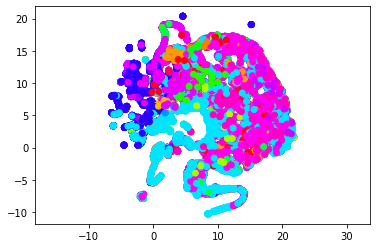

In [6]:
plt.scatter(
    proj_2d[:, 0],
    proj_2d[:, 1],
    c=dataraw["Tissue_cat"],
    cmap="hsv",
)
plt.gca().set_aspect('equal', 'datalim')
#plt.savefig("UMAP_3Gene_2D.png")

In [7]:
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=dataraw.Tissue, labels={'color': 'tissue type'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=dataraw.Tissue, labels={'color': 'tissue type'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_2d.write_image("UMAP_3Gene_2D.png")
fig_3d.show()
fig_3d.write_image("UMAP_3Gene_3D.png")
fig_3d.write_html("UMAP_3Gene.html")